# HLT Assignment

This exercise is split into three parts. In the first, we'll load and examine two datasets with associated classification problems. In the second section, we'll try logistic regression and then compare it's performance with some other models. Finally, in section 3, we'll try our new techniques on data from a Zindi competition, to see how the models performace compares with the top entries.

Deliverables are marked in bold and numbered - please make sure you answer all questions.

## Useful Libraries

In [1]:
# Importing all the libraries we'll use
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sklearn
from sklearn import model_selection, datasets, linear_model

%matplotlib inline

## Loading data

### Dataset 1 - Digits

This is somewhat of a 'hello world' of machine learning - classifying handwritten digits.

There is a digits dataset built in to sklearn, so we can access it easily (sklearn.datasets.load_digits())

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

X contains sets of features, and y contains the corresponding class. In this case, the features are the pixel values in an 8x8 image of a hand-written number. Let's look at the first digit:

In [33]:
X_digits[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [36]:
y_digits[0] # The class

0

Apparently, the first digit is a zero. Let's plot it and see what it looks like:

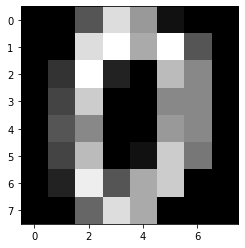

In [26]:
plt.imshow(X_digits[0].reshape(8, 8), cmap='gray')

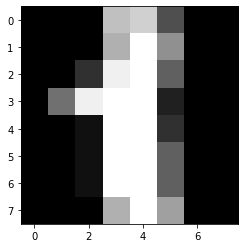

In [27]:
plt.imshow(X_digits[1].reshape(8, 8), cmap='gray')

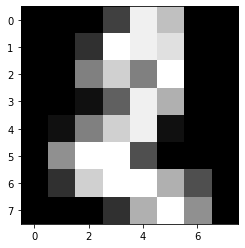

In [28]:
plt.imshow(X_digits[2].reshape(8, 8), cmap='gray')

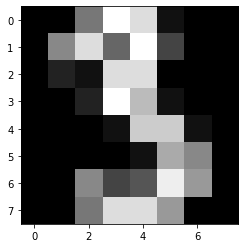

In [29]:
plt.imshow(X_digits[3].reshape(8, 8), cmap='gray')

#### Task 1: plot 3 more images. Do the tags (y values) match what you think the numbers look like?

In [ ]:
# Answer task 1 here

We could use the arrays of X and y as they are for model building, but we may as well put them into a pandas dataframe to get in some more practice!

In [ ]:
digits_df = pd.DataFrame(X_digits)
digits_df['class'] = y_digits
digits_df.head() # 64 pixel values then the class

As a final step, we'll split the data into test and train sets - the test set will be used to evaluate the model's performance

In [ ]:
digits_train, digits_test = model_selection.train_test_split(digits_df)

### Dataset 2 - Robot Collisions

In [ ]:
data = pd.read_csv('collisions.csv')
data.head()

The classses are mapped with the following: classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

You can read about the dataset from which these values were derived here: https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures. 

In [ ]:
# Looking at how the classes differ. 
data.hist(by='class', column='t3') # Try f1, f2, f3, t1, t2, t3
# Add sharex=True to the function above - does this make the differences clearer?

#### Task 2: Compare the mean values for force 1 ('f1') for normal operation (class 0) vs a collision (class 1)

In [ ]:
# Answer task 2 here

Again, the final step in getting this data ready is to split it into training data and test data.

In [ ]:
robot_train, robot_test = model_selection.train_test_split(data)

# Classification

We have the data loaded into training and test sets. Now we'll fit a logistic regression model and use this as a baseline for further investigations.

In [ ]:
model = linear_model.LogisticRegression(solver='liblinear', multi_class='auto') # Parameters to avoid warnings

In [ ]:
X = robot_train[['f1', 'f2', 'f3', 't1', 't2', 't3']] # The input columns
y = robot_train['class'] # Must be an integer
model.fit(X, y)

In [ ]:
model.score(X, y) # Score on the TRAINING data

In [ ]:
# And to score on the test data
XT = robot_test[['f1', 'f2', 'f3', 't1', 't2', 't3']]
yT = robot_test['class']
model.score(XT, yT)

In [ ]:
# Again, but tighter code - you can copy and paste this for quick tests
model = linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(robot_train[robot_train.columns[:-2]], robot_train['class'])
print("Training score: "+str(model.score(robot_train[robot_train.columns[:-2]], robot_train['class'])))
print("Test score:     "+str(model.score(robot_test[robot_test.columns[:-2]], robot_test['class'])))

In [ ]:
# And for digits:
model = linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(digits_train[digits_train.columns[:-1]], digits_train['class'])
print("Training score: "+str(model.score(digits_train[digits_train.columns[:-1]], digits_train['class'])))
print("Test score:     "+str(model.score(digits_test[digits_test.columns[:-1]], digits_test['class'])))

### Task 3: Note the scores, then re-run from the start to get a different test-train split. Have the scores changed?

# Trying different models

We've got data, and we've seen how to fit a model to that data and score it on a test dataset. Now for the fun part, and the main section of this exercise - trying out different models!

Check out how many different supervised learning models are available in scikit-learn: http://scikit-learn.org/stable/supervised_learning.html

We're going to use our datasets that we've prepared to try out different models. I'll list some common classifiers for you to try, and hint at what parameters you could change.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#..... Look at the docs and see if you can find one extra one! Make sure it's a classification algorithm

## Task 4: Try out at least ten different models, and pick your best!

These should include at least 3 different types of models, and some of the same type with different parameters.
Be sure to show scores or otherwise justify your choice of 'best model'

# Traffic Jam (Regression)

This data comes from a competition on Zindi. The training data was initially provided as individual ticket sales. You can check out the details <a href=https://zindi.africa/>on Zindi</a> (under 'Competitions').

The goal is to predict ticket sales for each ride (identified by ride ID), so I grouped by the 'ride ID' column and counted the tickets for each (.count()). The code keeps the other columns of interest.


`train = df.groupby(['ride_id', 'travel_date', 'travel_time',  'travel_from', 'car_type', 'max_capacity']).size().reset_index(name='Count')`

For convenience, the data is now in two csv files, 'sales.csv' for model development and 'test_questions.csv' to make predictions on. Each has the same format. For testing, split 'train' further to validate your models. To see how you'd score on Zindi you'll have to sign up for an account and upload your predictions. This example shows creating the predictions file in the correct format.

In [ ]:
df = pd.read_csv('sales.csv', parse_dates = ['travel_date'])
df.head(10)

In [ ]:
# Try different feature engineering tricks.
# For this example, we just convert the 'travel_from' column into dumy vars and fit a model from that
data = pd.get_dummies(df, columns=['travel_from'])

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Define our input columns
in_cols = data.columns.values.tolist()
in_cols.remove('Count')
in_cols.remove('ride_id')
in_cols.remove('travel_time')
in_cols.remove('travel_date')
in_cols.remove('car_type')

# Inputs and desired output (count)
X = data[in_cols]
y = data['Count']

# Split into test/train (the provided test set has no answers, so we need to make our own test set for model comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y)

regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
# Plot y_test (the correct values) against regr.predict(X_test) (the predictions) - do they match well?

## Task 4: Try out at least three models, and add at least one feature

In [ ]:
# Trying different models and parameters

## Making a submission

To submit on Zindi, we need to make predictions for the test set. We do the same to the test data, make predictions and store these in a csv.

In [ ]:
# Load the data
test = pd.read_csv('test_questions.csv', parse_dates = ['travel_date'])
test.head() # Same as 'sales' but missing the 'Count' column

In [ ]:
# Add the same features as you dod for the training data:
test_data = pd.get_dummies(test, columns=['travel_from']) # Creating our dummy variables as before

In [ ]:
# Add a column with the predictions
test['Count'] = regr.predict(test_data[in_cols]) # Modify if you've added columns etc
test.head()

In [ ]:
# Save as csv - can be uploaded to Zindi (note - just ride_id and Count coluns are included)
test[['ride_id', 'Count']].to_csv('preds.csv', index=False)